In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pcos = pd.read_csv('/content/PCOS_data (2).csv')

In [ ]:
pcos.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


In [ ]:
pcos.drop(["Unnamed: 44","Sl. No","Patient File No."],axis="columns", inplace= True)

In [ ]:
pcos

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [ ]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of abortions        541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [ ]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors='coerce')
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

pcos['Marraige Status (Yrs)'].fillna(pcos['Marraige Status (Yrs)'].median(),inplace=True)
pcos['II    beta-HCG(mIU/mL)'].fillna(pcos['II    beta-HCG(mIU/mL)'].median(),inplace=True)
pcos['AMH(ng/mL)'].fillna(pcos['AMH(ng/mL)'].median(),inplace=True)
pcos['Fast food (Y/N)'].fillna(pcos['Fast food (Y/N)'].median(),inplace=True)

In [ ]:
# Changing the title of the properties.

pcos = pcos.rename(columns = {"PCOS (Y/N)":"Target"})

## EDA

In [ ]:
# Having a look at some basic statistical details.

pcos.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


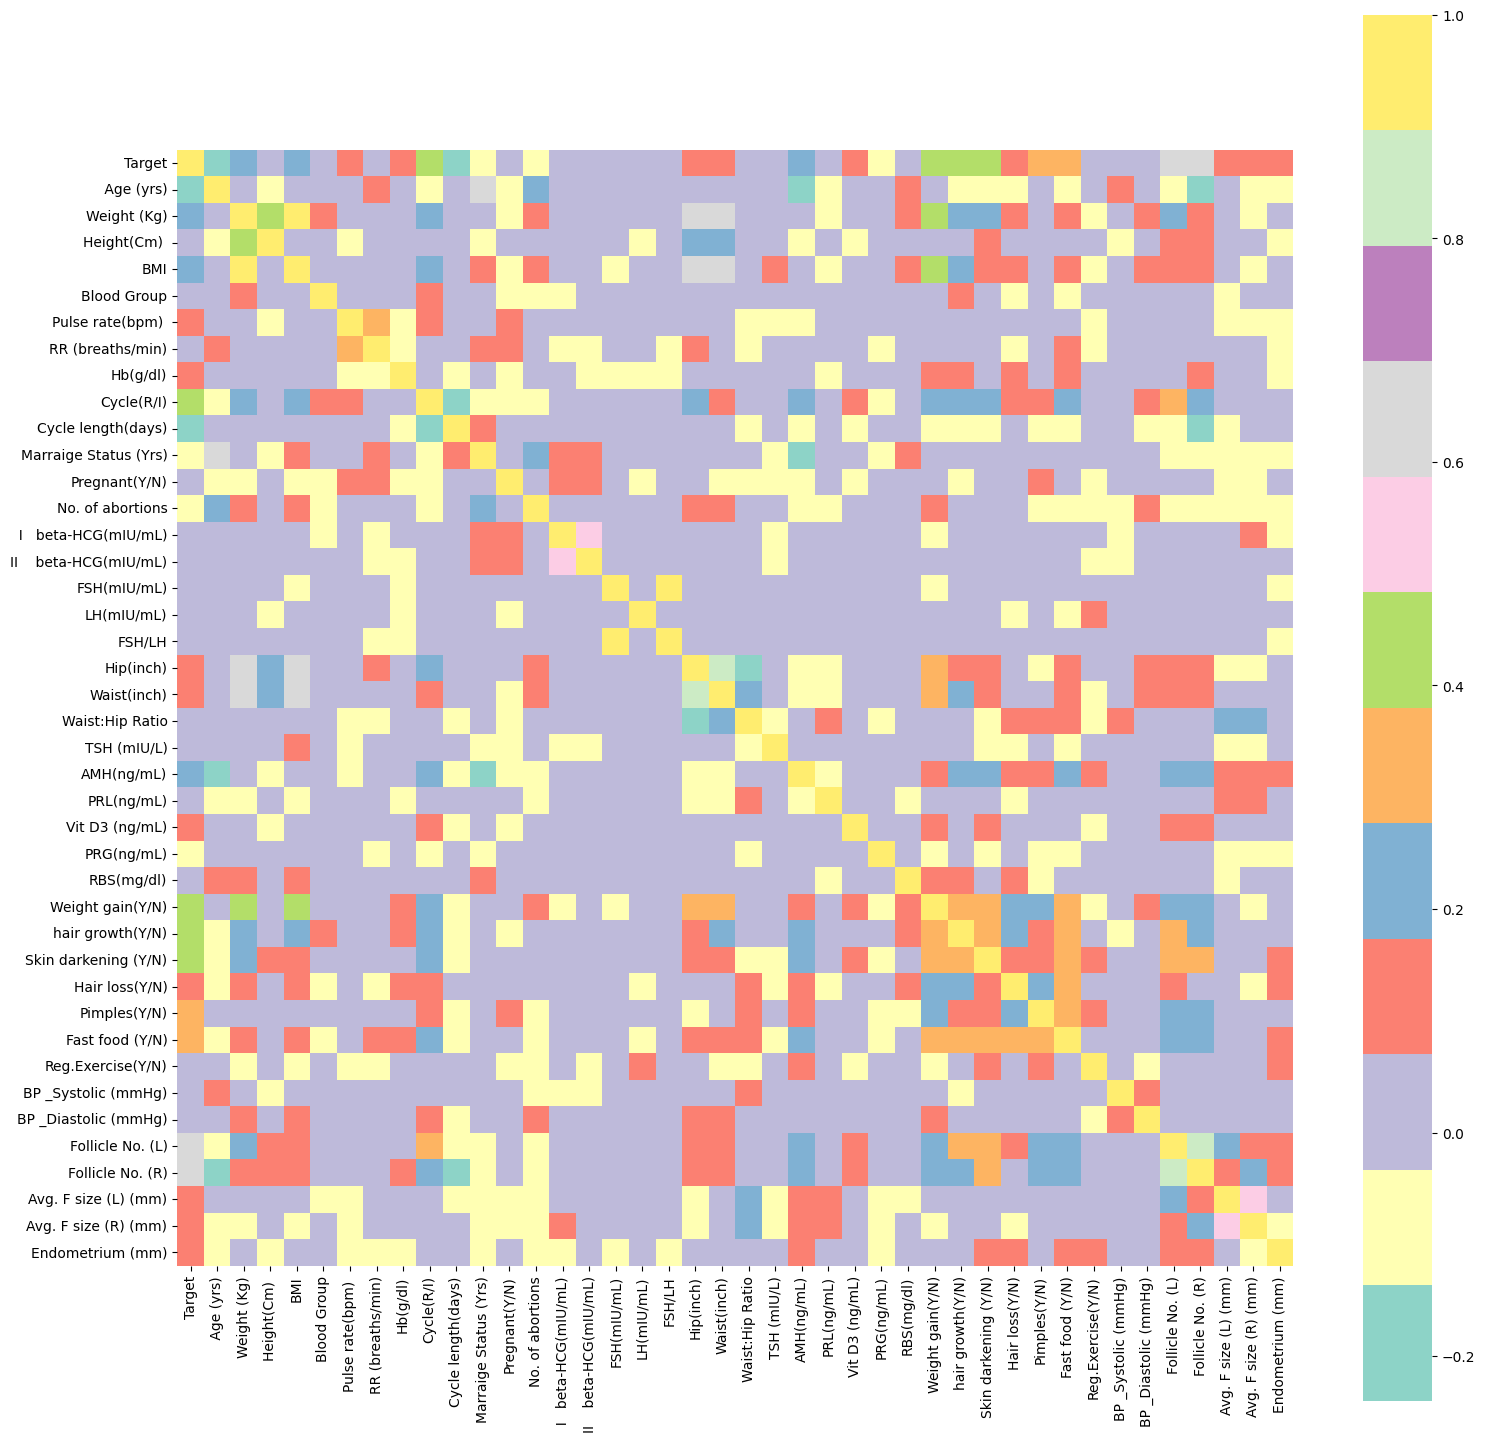

In [ ]:
# Examaning a correlation matrix of all the features.

corrmat = pcos.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set3", square=True);

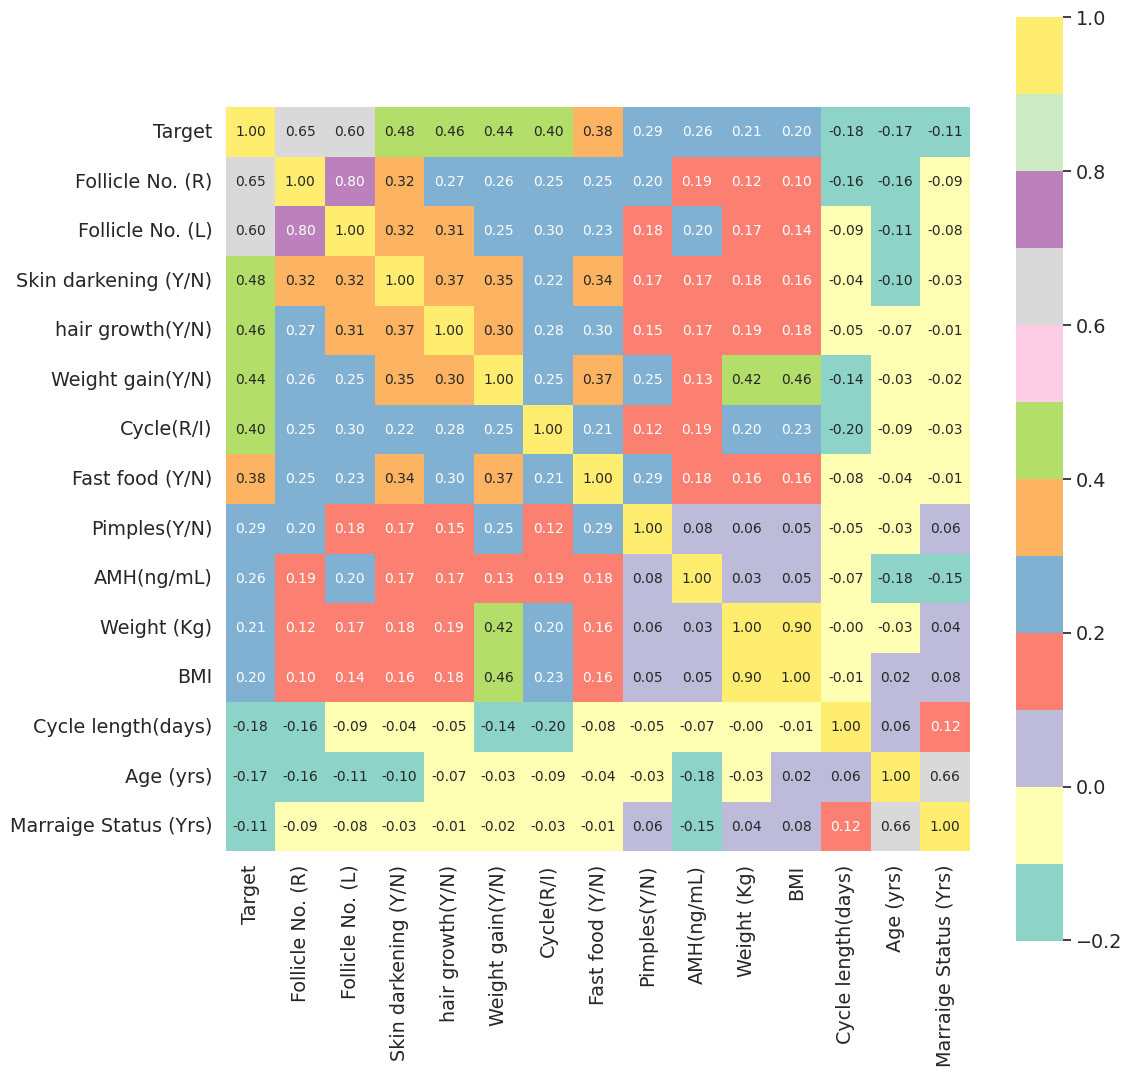

In [ ]:
# Having a look at features bearing significant correlation.

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k,'Target')['Target'].index 
cols_n = corrmat.nsmallest(l, 'Target')['Target'].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(pcos[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set3", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
colors = ['#670067','#008080']

In [ ]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = pcos[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))


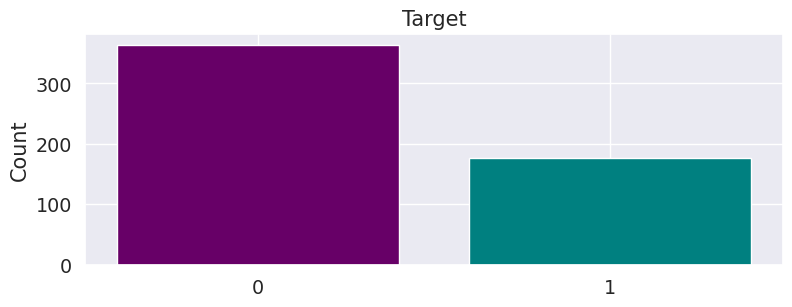

Target: 
 0    364
1    177
Name: Target, dtype: int64


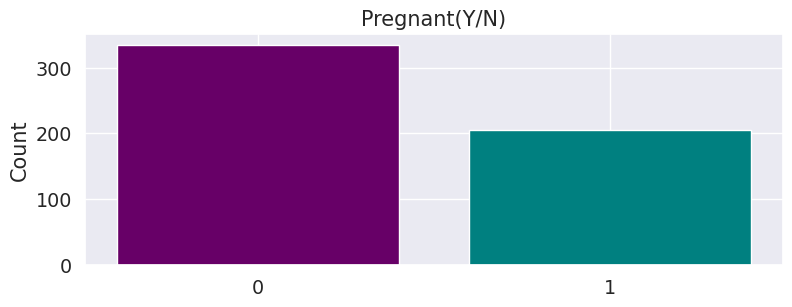

Pregnant(Y/N): 
 0    335
1    206
Name: Pregnant(Y/N), dtype: int64


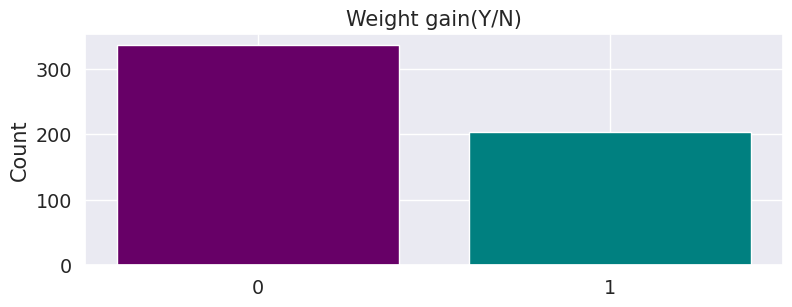

Weight gain(Y/N): 
 0    337
1    204
Name: Weight gain(Y/N), dtype: int64


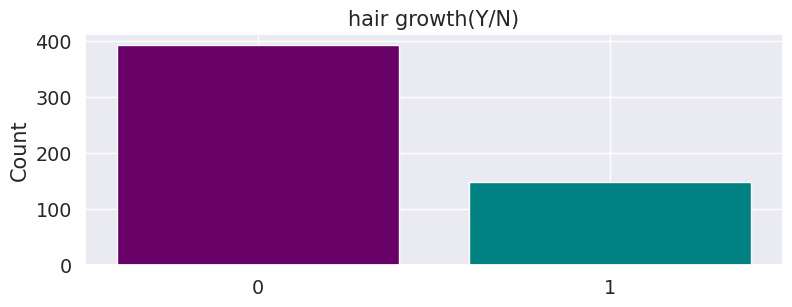

hair growth(Y/N): 
 0    393
1    148
Name: hair growth(Y/N), dtype: int64


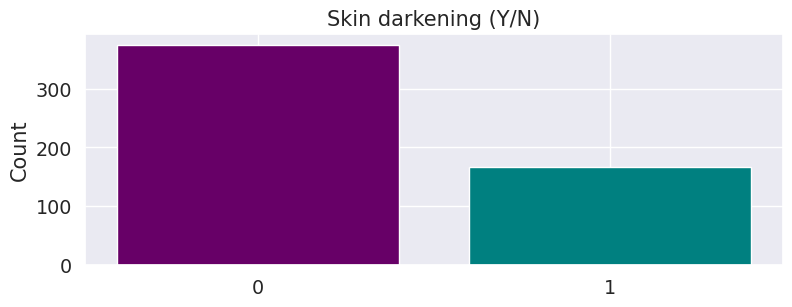

Skin darkening (Y/N): 
 0    375
1    166
Name: Skin darkening (Y/N), dtype: int64


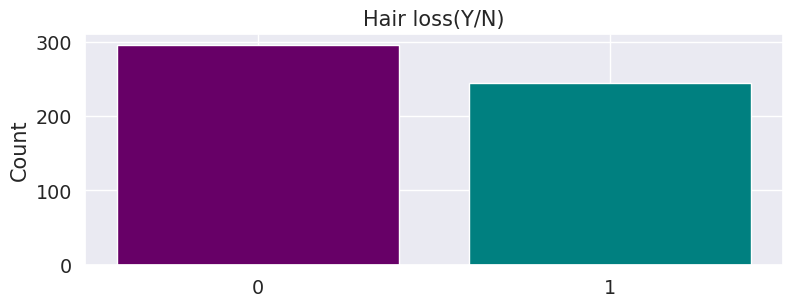

Hair loss(Y/N): 
 0    296
1    245
Name: Hair loss(Y/N), dtype: int64


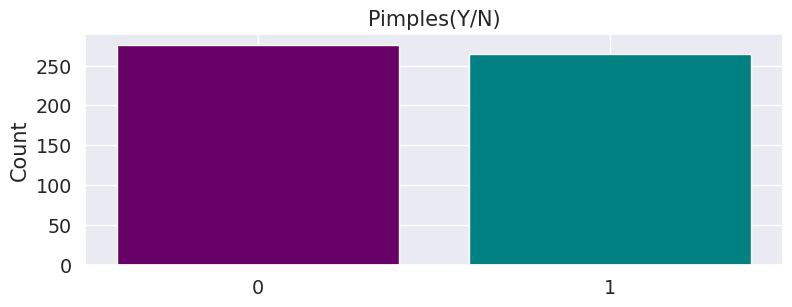

Pimples(Y/N): 
 0    276
1    265
Name: Pimples(Y/N), dtype: int64


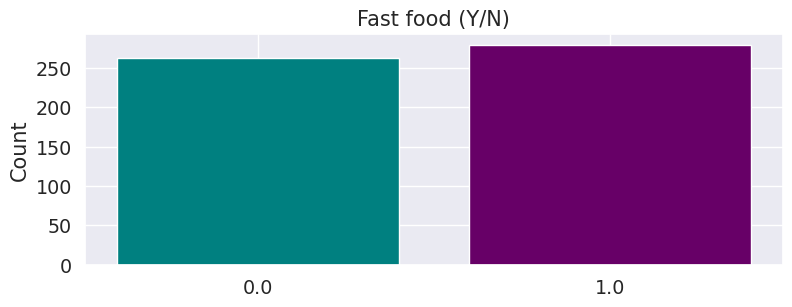

Fast food (Y/N): 
 1.0    279
0.0    262
Name: Fast food (Y/N), dtype: int64


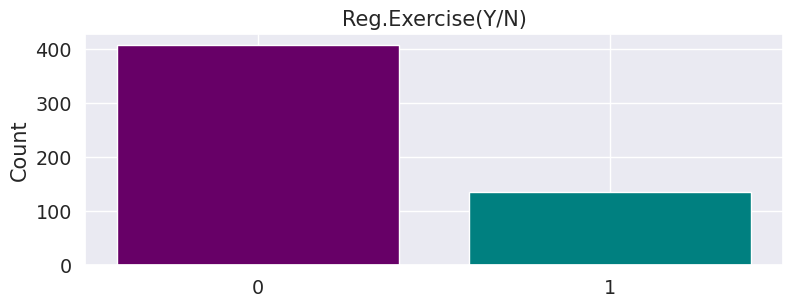

Reg.Exercise(Y/N): 
 0    407
1    134
Name: Reg.Exercise(Y/N), dtype: int64


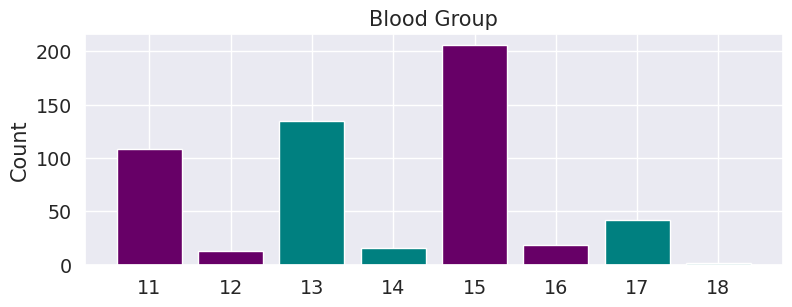

Blood Group: 
 15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64


In [ ]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [ ]:
# How all the features correlate with the PCOS. 

corrmat['Target'].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

In [ ]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression", "Random Forest(Chi Square)"]
Scores =[]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(pcos.drop("Target",axis="columns"),pcos['Target'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
All_factors = RandomForestClassifier(max_depth=40)
All_factors.fit(x_train,y_train)

RandomForestClassifier(max_depth=40)

In [ ]:
All_factors.score(x_test,y_test)

0.9174311926605505

In [ ]:
All_factors.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:

y_test

71     0
392    1
378    0
365    0
140    0
      ..
299    0
229    0
537    0
496    0
10     0
Name: Target, Length: 109, dtype: int64

In [ ]:
Scores.append(All_factors.score(x_test,y_test))

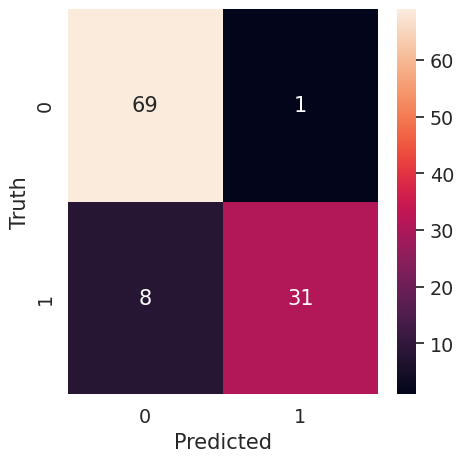

In [ ]:
y_pred=All_factors.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn import tree
All_Factors2 = tree.DecisionTreeClassifier()
All_Factors2.fit(x_train,y_train)
All_Factors2.score(x_test,y_test)

0.8165137614678899

In [ ]:
Scores.append(All_Factors2.score(x_test,y_test))

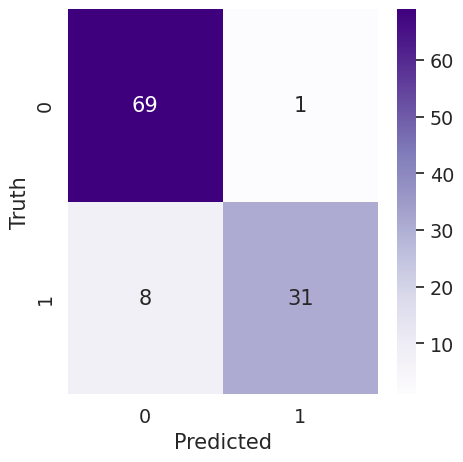

In [ ]:
y_pred=All_factors.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.svm import SVC
All_Factors3= SVC()
All_Factors3.fit(x_train,y_train)
All_Factors3.score(x_test,y_test)

0.6422018348623854

In [ ]:
Scores.append(All_Factors3.score(x_test,y_test))

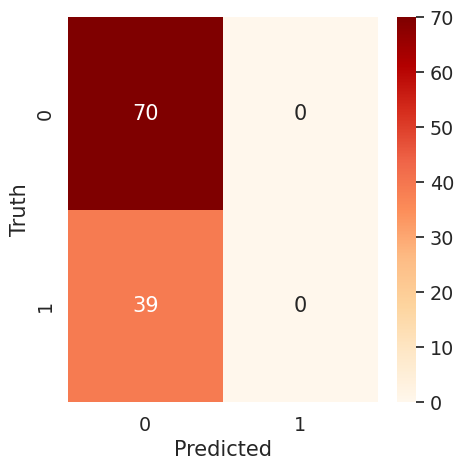

In [ ]:
y_pred=All_Factors3.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="OrRd")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
All_Factors4 = LogisticRegression()
All_Factors4.fit(x_train,y_train)
All_Factors4.score(x_test,y_test)

0.8348623853211009

In [ ]:
Scores.append(All_Factors4.score(x_test,y_test))

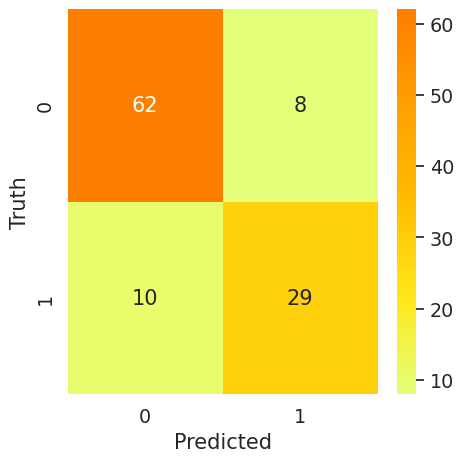

In [ ]:
y_pred=All_Factors4.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Wistia")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

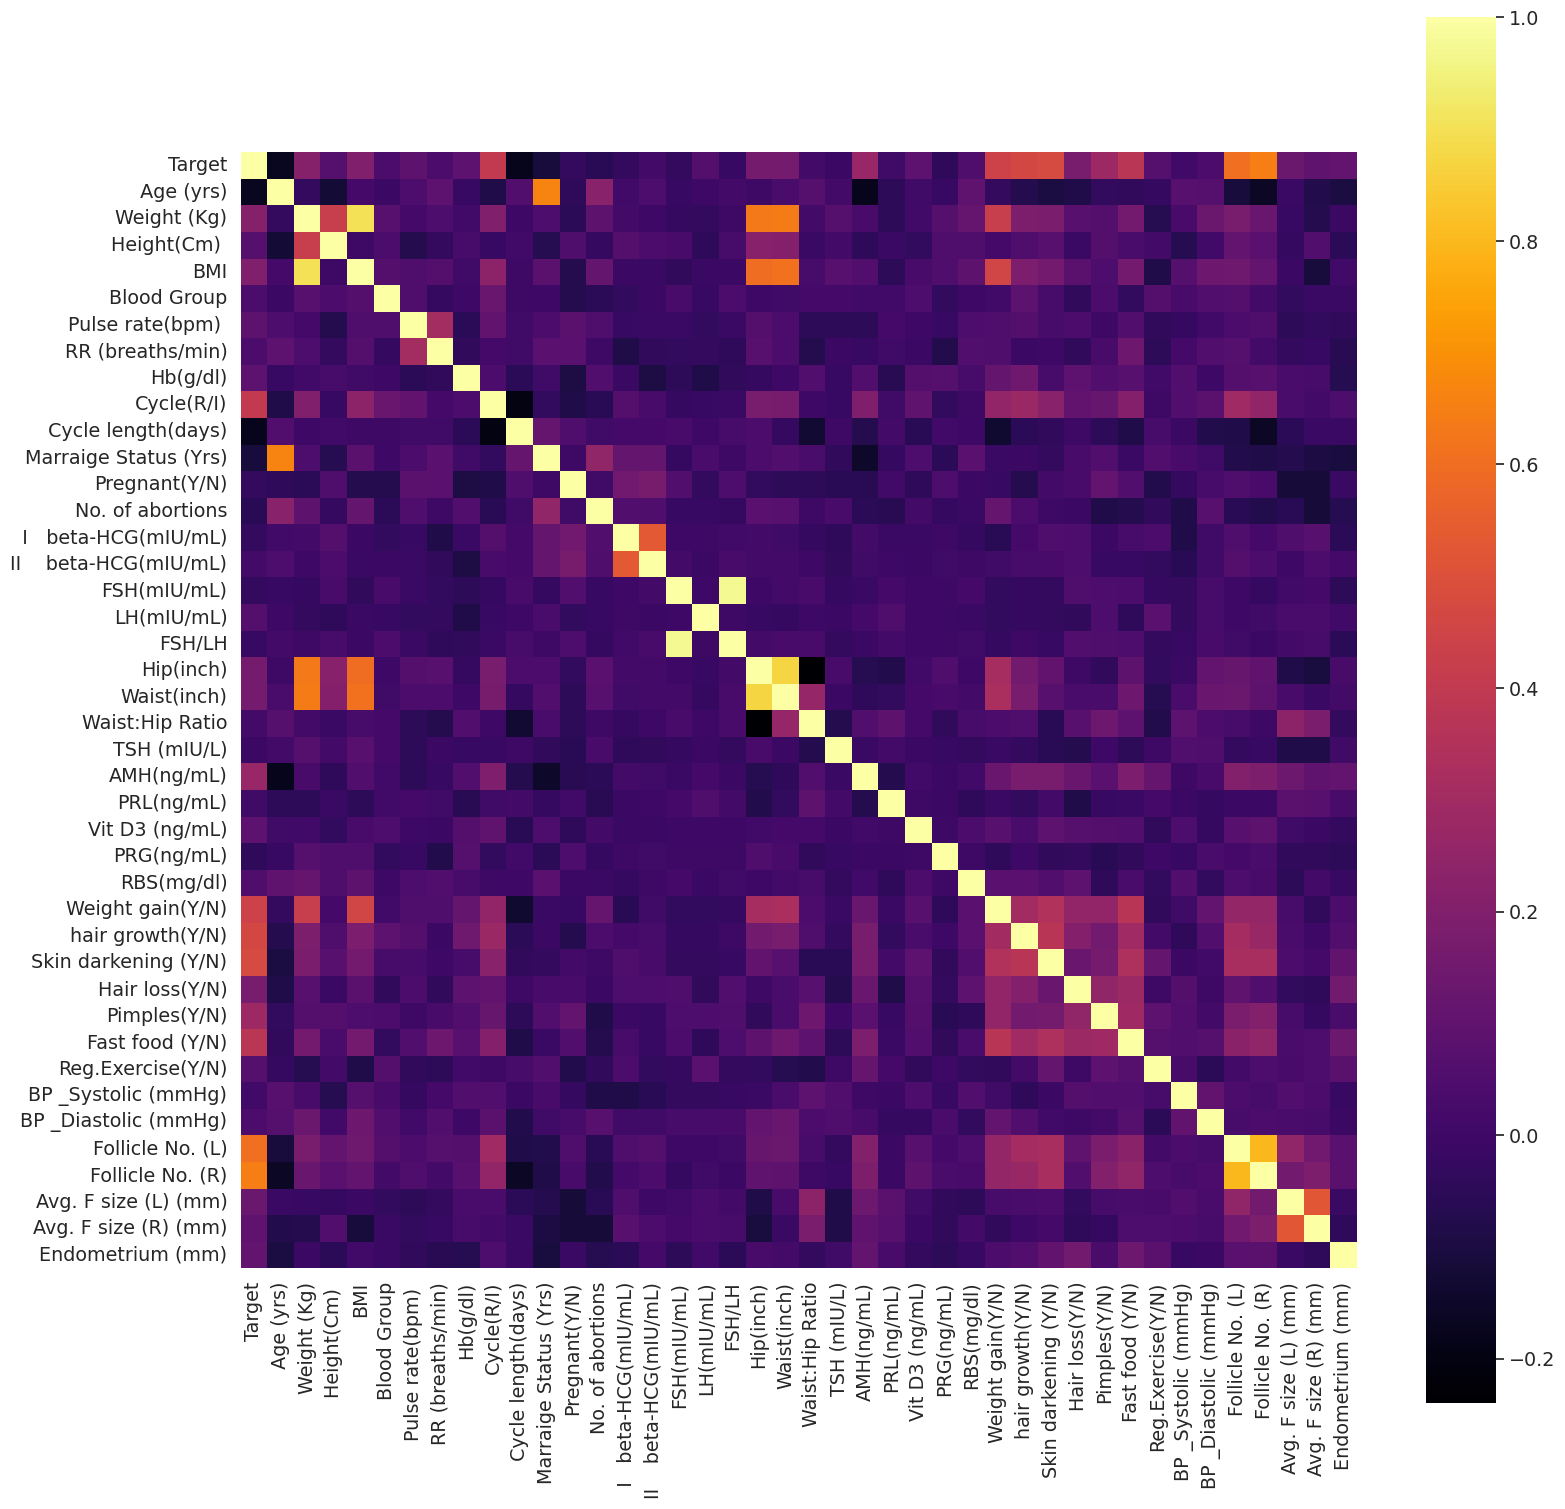

In [ ]:
corrmat = pcos.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="inferno", square=True);
sns.set(font_scale=1.45)

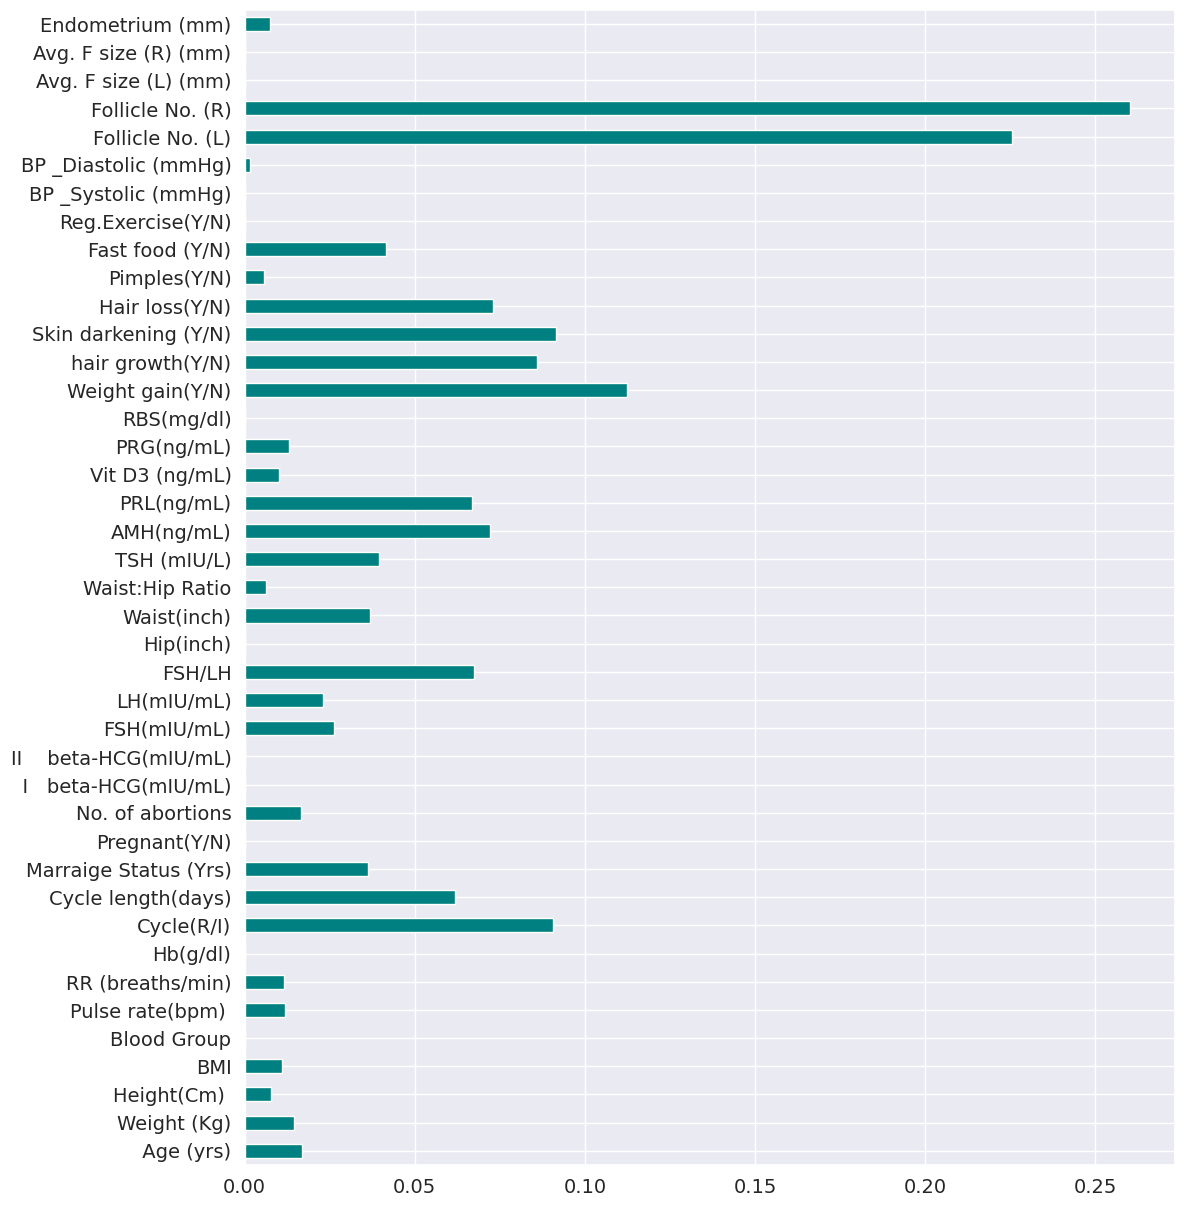

In [ ]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(pcos.drop("Target",axis="columns"), pcos['Target'])
feat_imp = pd.Series(imp, pcos.columns[1:len(pcos.columns)])
feat_imp.plot(kind='barh', color='teal', figsize=(12,15), fontsize=14, grid=True)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_feat= SelectKBest(chi2,k=10)
feat= chi2_feat.fit_transform(pcos.drop("Target",axis="columns"), pcos['Target'])
feat.shape

(541, 10)

In [ ]:
Xc_train,Xc_test,y_train,y_test =train_test_split(feat ,pcos['Target'], test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
chi2_factors = RandomForestClassifier(max_depth=40)
chi2_factors.fit(Xc_train,y_train)
chi2_factors.score(Xc_test,y_test)

0.8899082568807339

In [ ]:
chi2_feat2= SelectKBest(chi2,k=30)
feat= chi2_feat2.fit_transform(pcos.drop("Target",axis="columns"), pcos['Target'])
feat.shape

(541, 30)

In [ ]:
Xc2_train,Xc2_test,y_train,y_test =train_test_split(feat ,pcos['Target'], test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
chi2_factors2 = RandomForestClassifier(max_depth=40)
chi2_factors2.fit(Xc2_train,y_train)
chi2_factors2.score(Xc2_test,y_test)

0.908256880733945

In [ ]:
Scores.append(chi2_factors2.score(Xc2_test,y_test))

Text(0.5, 1.0, 'How different attributes affect PCOS\n\n')

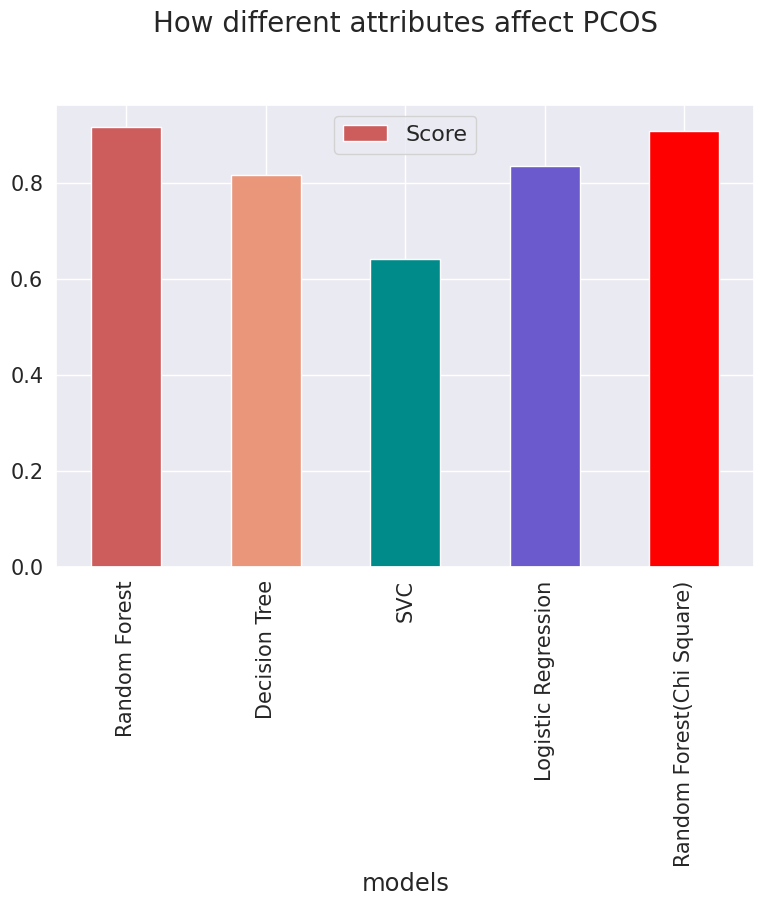

In [ ]:
d1 = pd.DataFrame()
d1["models"]= Models
d1["Score"]=Scores
colour=["Indianred","darksalmon","darkcyan","Slateblue", "red"]
d1.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How different attributes affect PCOS\n\n', fontsize=20)

In [ ]:
attributes2A=["Target",'Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)',\
              'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'Reg.Exercise(Y/N)']
g=sns.pairplot(pcos[attributes2A], hue="Target", corner=True, diag_kind="kde", markers=["*","o"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
attributes2A1=['Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)',\
              'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'Reg.Exercise(Y/N)']
colours=['PaleTurquoise','HotPink']
for i in attributes2A1:
    sns.swarmplot(x=pcos["Target"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["Target"], y=pcos[i], palette=colours)
    plt.show()

In [ ]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score1 =[]

In [ ]:
model1= RandomForestClassifier(max_depth=40)
attributes3=['Weight gain(Y/N)', 'hair growth(Y/N)',\
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',\
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

x_train1,x_test1,y_train1,y_test1 =train_test_split(pcos[attributes3],pcos['Target'], test_size=0.2, random_state=0)

In [ ]:
model1.fit(x_train1,y_train1)

In [ ]:
model1.score(x_test1,y_test1)

In [ ]:
Score1.append(model1.score(x_test1,y_test1))

In [ ]:
model1A = tree.DecisionTreeClassifier()
model1A.fit(x_train1,y_train1)

In [ ]:
model1A.score(x_test1,y_test1)

In [ ]:
Score1.append(model1A.score(x_test1,y_test1))

In [ ]:
model1B= SVC()
model1B.fit(x_train1,y_train1)

In [ ]:
model1B.score(x_test1,y_test1)

In [ ]:
Score1.append(model1B.score(x_test1,y_test1))

In [ ]:
model1C = LogisticRegression()
model1C.fit(x_train1,y_train1)

In [ ]:
model1C.score(x_test1,y_test1)

In [ ]:
Score1.append(model1C.score(x_test1,y_test1))

In [ ]:
d1 = pd.DataFrame()
d1["models"]= Models
d1["Score"]=Score1
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d1.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Physical Symptoms affect PCOS\n\n', fontsize=20)

In [ ]:
attributes=['Target','  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)']
hormone = pcos[attributes]
m= sns.pairplot(data=hormone, hue="Target", corner=True, diag_kind="kde", markers=["*","o"])
m.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
attributes1=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
for i in attributes1:
    sns.swarmplot(x=pcos["Target"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["Target"], y=pcos[i], palette=colours)
    plt.show()

In [ ]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score =[]

In [ ]:
attributes4=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
model2=RandomForestClassifier(max_depth=40)
x_train2,x_test2,y_train2,y_test2 =train_test_split(pcos[attributes4],pcos['Target'], test_size=0.2, random_state=0)
model2.fit(x_train2,y_train2)

In [ ]:
model2.score(x_test2,y_test2)

In [ ]:
Score.append(model2.score(x_test2,y_test2))

In [ ]:
model2A = tree.DecisionTreeClassifier()
model2A.fit(x_train2,y_train2)
model2A.score(x_test2, y_test2)

In [ ]:
Score.append(model2A.score(x_test2,y_test2))

In [ ]:
model2B = SVC()
model2B.fit(x_train2,y_train2)
model2B.score(x_test2, y_test2)

In [ ]:
Score.append(model2B.score(x_test2,y_test2))

In [ ]:
model2C = LogisticRegression()
model2C.fit(x_train2,y_train2)
model2C.score(x_test2, y_test2)

In [ ]:
Score.append(model2C.score(x_test2, y_test2))

In [ ]:
d2 = pd.DataFrame()
d2["models"]= Models
d2["Score"]=Score
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d2.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Hormone affect PCOS\n\n', fontsize=20)

In [ ]:
attributes2=['Target','BMI','Blood Group','Pulse rate(bpm) ','RR (breaths/min)','Hb(g/dl)']
n= sns.pairplot(pcos[attributes2], hue='Target', corner=True, diag_kind="kde", markers=["*","o"])
n.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
attributes5=['Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)']
for i in attributes5:
    sns.swarmplot(x=pcos["Target"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["Target"], y=pcos[i], palette=colours)
    plt.show()

In [ ]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score2 =[]

In [ ]:
model3=RandomForestClassifier(max_depth=40)
x_train3,x_test3,y_train3,y_test3 =train_test_split(pcos[attributes5],pcos['Target'], test_size=0.2)
model3.fit(x_train3,y_train3)

In [ ]:
model3.score(x_test3,y_test3)

In [ ]:
Score2.append(model3.score(x_test3,y_test3))

In [ ]:
model3A = tree.DecisionTreeClassifier()
model3A.fit(x_train3,y_train3)
model3A.score(x_test3, y_test3)

In [ ]:
Score2.append(model3.score(x_test3,y_test3))

In [ ]:
model3B = SVC()
model3B.fit(x_train3,y_train3)
model3B.score(x_test3, y_test3)

In [ ]:
Score2.append(model3B.score(x_test3, y_test3))

In [ ]:
model2C = LogisticRegression()
model2C.fit(x_train3,y_train3)
model2C.score(x_test3, y_test3)

In [ ]:
Score2.append(model2C.score(x_test3, y_test3))

In [ ]:
d3 = pd.DataFrame()
d3["models"]= Models
d3["Score"]=Score2
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d3.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Breathing and Blood Parameters affect PCOS\n\n', fontsize=20)

In [ ]:
attributes6 = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI','Cycle(R/I)', 'Cycle length(days)',\
               'Marraige Status (Yrs)',\
       'Pregnant(Y/N)', 'No. of abortions']
for i in attributes6:
    sns.swarmplot(x=pcos["Target"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["Target"], y=pcos[i], palette=colours)
    plt.show()

In [ ]:
attributes7 = ['BP _Systolic (mmHg)',\
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',\
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
for i in attributes7:
    sns.swarmplot(x=pcos["Target"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["Target"], y=pcos[i], palette=colours)
    plt.show()

In [ ]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score4 =[]

In [ ]:
model4=RandomForestClassifier(max_depth=40)
x_train4,x_test4,y_train4,y_test4 =train_test_split(pcos[attributes4],pcos['Target'], test_size=0.2, random_state=0)
model4.fit(x_train4,y_train4)

In [ ]:
model4.score(x_test4,y_test4)

In [ ]:
Score4.append(model4.score(x_test4,y_test4))

In [ ]:
model4A = tree.DecisionTreeClassifier()
model4A.fit(x_train4,y_train4)
model4A.score(x_test4, y_test4)

In [ ]:
Score4.append(model4A.score(x_test4,y_test4))

In [ ]:
model4B = SVC()
model4B.fit(x_train4,y_train4)
model4B.score(x_test4, y_test4)

In [ ]:
Score4.append(model4B.score(x_test4, y_test4))

In [ ]:
model4C = LogisticRegression()
model4C.fit(x_train4,y_train4)
model4C.score(x_test4, y_test4)

In [ ]:
Score4.append(model4C.score(x_test4, y_test4))

In [ ]:
d4 = pd.DataFrame()
d4["models"]= Models
d4["Score"]=Score4
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d4.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('Internal Organs Functioning Affecting PCOS\n\n', fontsize=20)

In [ ]:
attributes4A=["Target",'BP _Systolic (mmHg)',\
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',\
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
g=sns.pairplot(pcos[attributes4A], hue="Target", corner=True, diag_kind="kde", markers=["*","o"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [ ]:
pcos['Target'].value_counts()

In [ ]:
X=pcos.drop(columns='Target', axis=1)
Y=pcos['Target']

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
input_data = (3,3,1,33,68.8,165,25.3,11,72,18,11.8,2,5,10,1,0,494.08,494.08,5.54,0.88,6.3,40,36,0.9,2.54,6.63,10.52,49.7,0.36,84,0,0,0,1,1,1,0,120,80,13,15,)


#changing a input data to numpy arrays
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting  the label for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
  print('PCOS not')
else:
  print('PCOS ')